In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv('technical_support_data.xls')

In [36]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [37]:
from scipy.stats import zscore

num_df = df.drop('PROBLEM_TYPE', axis=1)
num_df = num_df.apply(zscore)

df_upd = df[['PROBLEM_TYPE']].join(num_df)

In [38]:
df_upd.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,power chord does not tightly fit,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,Fan swing not working,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,Main switch does not on,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,Forgot mobile app password,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


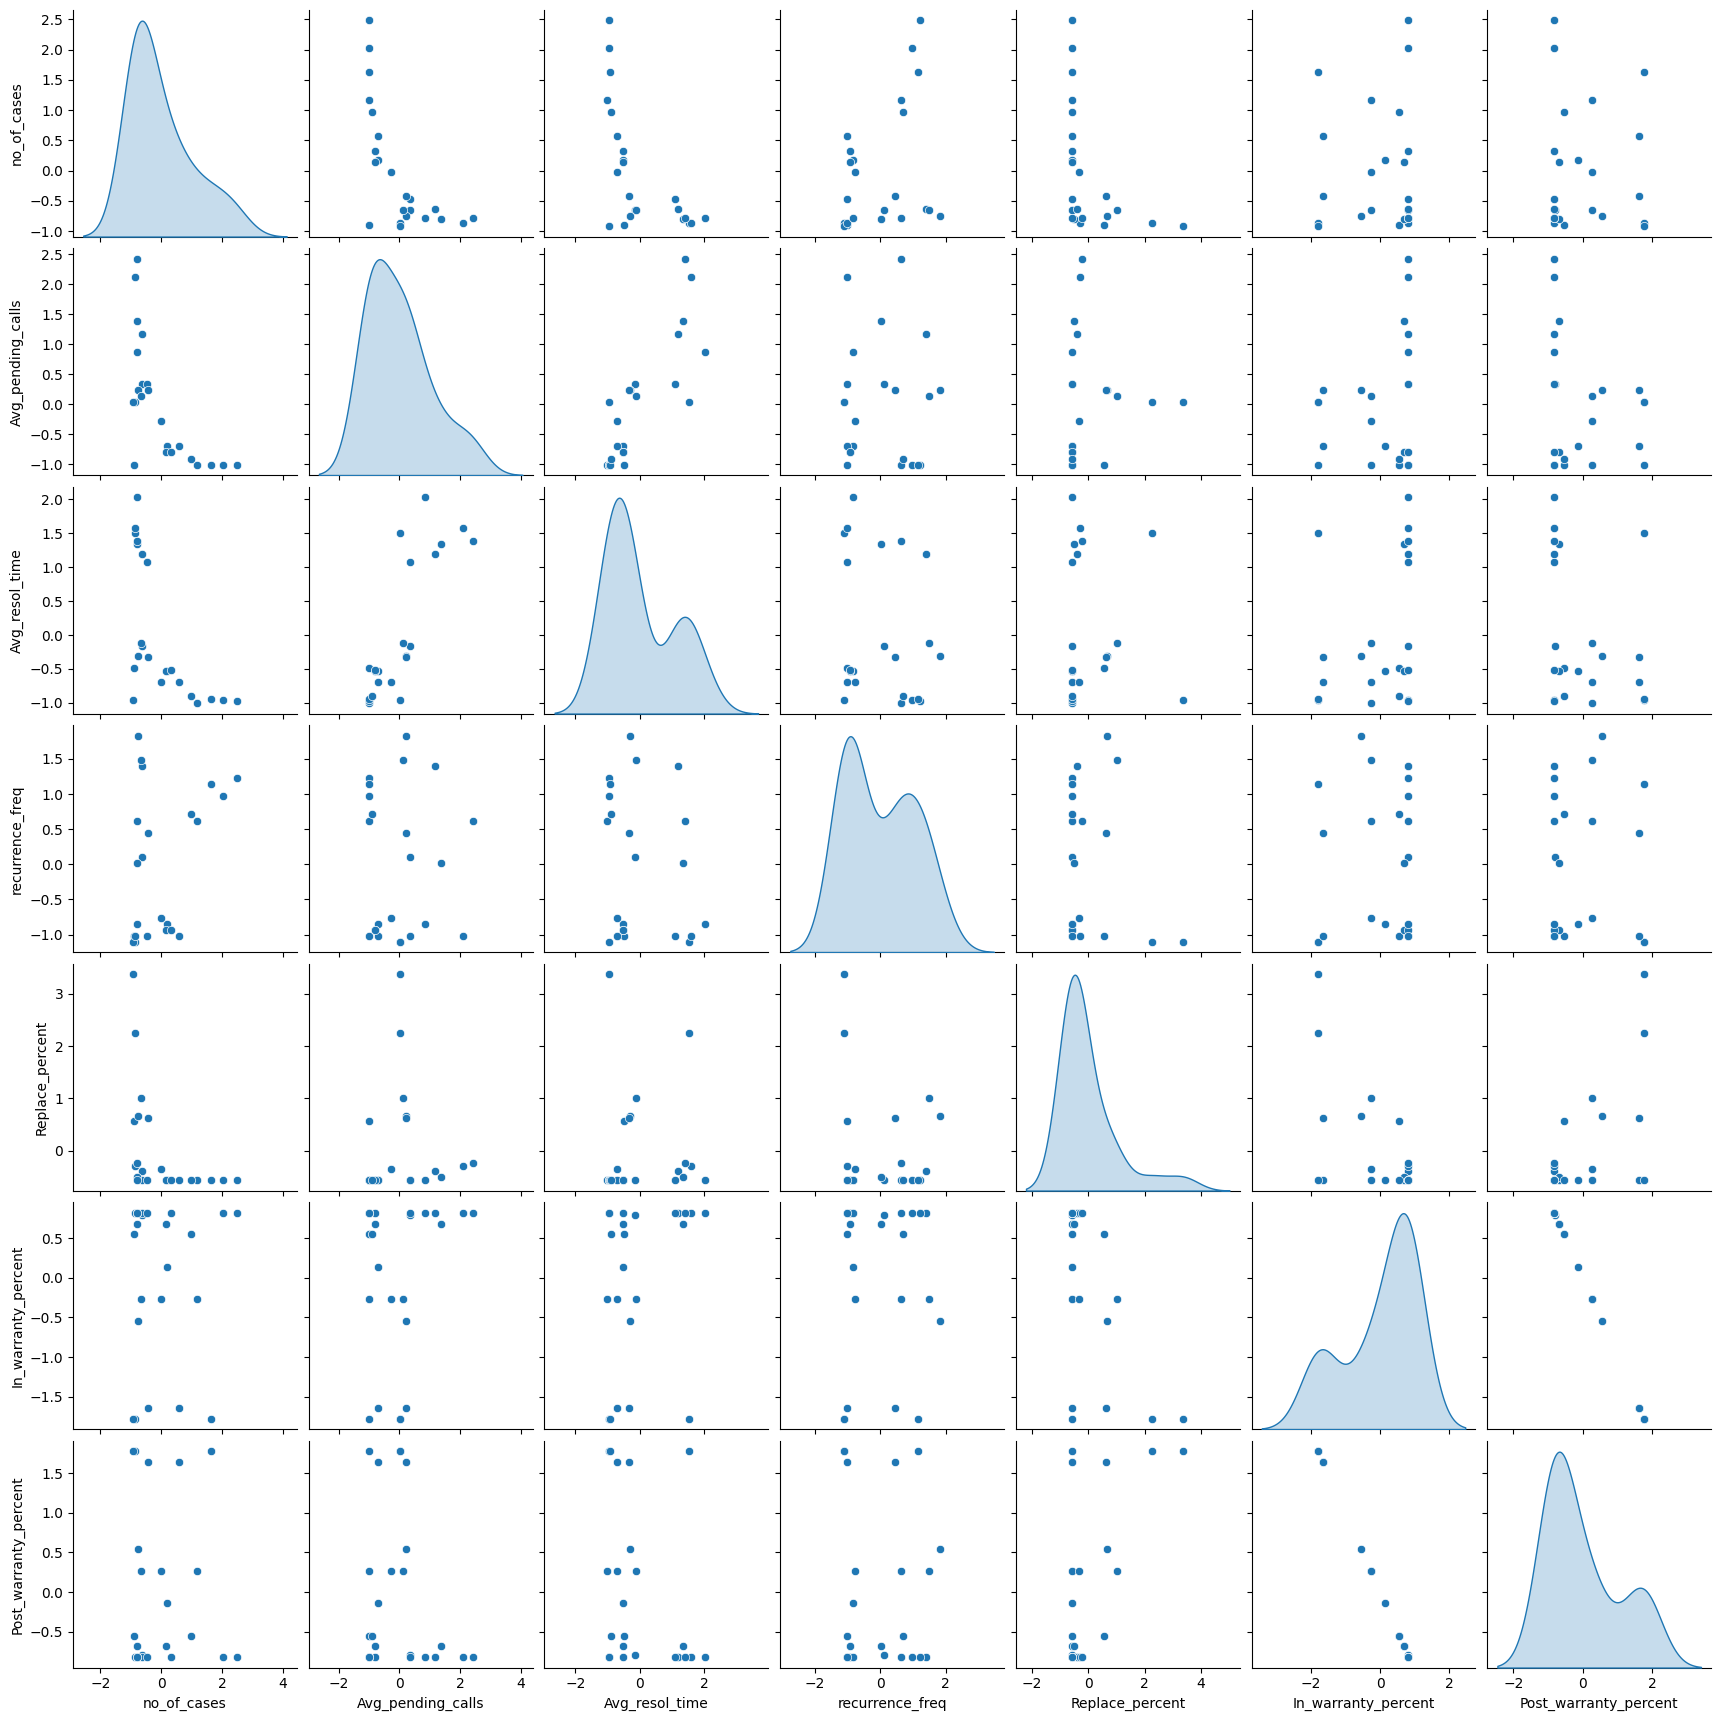

In [39]:
sns.pairplot(num_df, diag_kind='kde')
plt.show()

In [40]:
from scipy.spatial.distance import cdist
model = KMeans(n_clusters = 3)
model.fit(num_df)

KMeans(n_clusters=3)

In [41]:
model.cluster_centers_

array([[-0.20199056, -0.151228  , -0.26297348,  0.24037539,  0.97052971,
        -1.34802042,  1.34802042],
       [-0.7105498 ,  1.23115099,  1.20818948, -0.10439466, -0.44114987,
         0.79898435, -0.79898435],
       [ 0.70975361, -0.83994011, -0.735168  , -0.10576279, -0.41173988,
         0.42702805, -0.42702805]])

In [42]:
cdist(num_df, model.cluster_centers_, 'euclidean')   # Every Data point distance from the 3 centroids printed above.

array([[2.90891939, 3.00173086, 1.0355858 ],
       [2.72250689, 4.80237067, 5.10375769],
       [3.19872352, 3.14782968, 2.12477961],
       [2.99193579, 5.91339532, 5.33588653],
       [3.46395291, 1.64921128, 1.97427245],
       [4.08541269, 1.50663569, 3.48675489],
       [4.63716281, 1.33703788, 4.20491235],
       [3.55124486, 2.94153696, 1.09164323],
       [2.82823452, 4.0422121 , 1.3606903 ],
       [3.96937796, 0.30180372, 3.41290309],
       [4.54796047, 1.42439209, 4.27413253],
       [2.27792892, 4.66501095, 3.07333878],
       [3.73037079, 2.98632206, 1.09725471],
       [4.4236268 , 1.17607233, 3.6948655 ],
       [4.29882312, 4.28554457, 1.81515635],
       [4.60601883, 4.66906717, 2.31331853],
       [2.84236231, 5.47402416, 3.49515156],
       [2.29243245, 3.0218959 , 1.49942711],
       [3.93086   , 1.31073158, 2.6870489 ],
       [3.48140134, 3.55879936, 0.90314884],
       [2.08538173, 3.45050927, 3.2064514 ],
       [2.04180929, 3.14770762, 2.95283307],
       [0.

In [43]:
np.min(cdist(num_df, model.cluster_centers_, 'euclidean'), axis=1)

array([1.0355858 , 2.72250689, 2.12477961, 2.99193579, 1.64921128,
       1.50663569, 1.33703788, 1.09164323, 1.3606903 , 0.30180372,
       1.42439209, 2.27792892, 1.09725471, 1.17607233, 1.81515635,
       2.31331853, 2.84236231, 1.49942711, 1.31073158, 0.90314884,
       2.08538173, 2.04180929, 0.73819849])

In [44]:
sum(np.min(cdist(num_df, model.cluster_centers_, 'euclidean'), axis=1)) # This is our Within Cluster sum of distances between data points and their centroids

37.647012490824594

Let's calculate this for K = 1 to K = 10 and plot graph to find Elbow

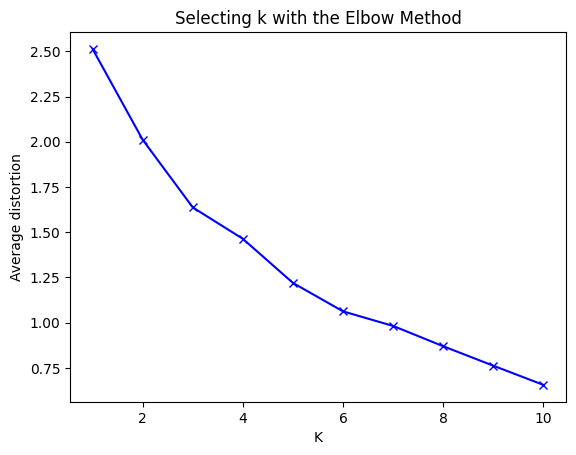

In [45]:
clusters = range(1,11)
mean_wcss = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(num_df)
    mean_wcss.append(sum(np.min(cdist(num_df, model.cluster_centers_, 'euclidean'), axis=1)) / num_df.shape[0])

plt.plot(clusters, mean_wcss, 'bx-')
plt.xlabel('K')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

Let's look at K=2 and K=3

In [46]:
model_2 = KMeans(n_clusters = 2)
model_2.fit(num_df)
pred = model_2.predict(num_df)

df_upd['GROUP_CLUSTER=2'] = pred
df2 = df_upd
df2[['PROBLEM_TYPE','GROUP_CLUSTER=2']]

,PROBLEM_TYPE,GROUP_CLUSTER=2
0,Temperature control not working,1
1,power chord does not tightly fit,1
2,Fan swing not working,1
3,Main switch does not on,1
4,Forgot mobile app password,0
5,AC stops abruptly,0
6,App hangs while entring commands,0
7,App takes a long time to initialize,1
8,Unable to connect the App to the device,1
9,Reinstalling the app hangs the phone,0


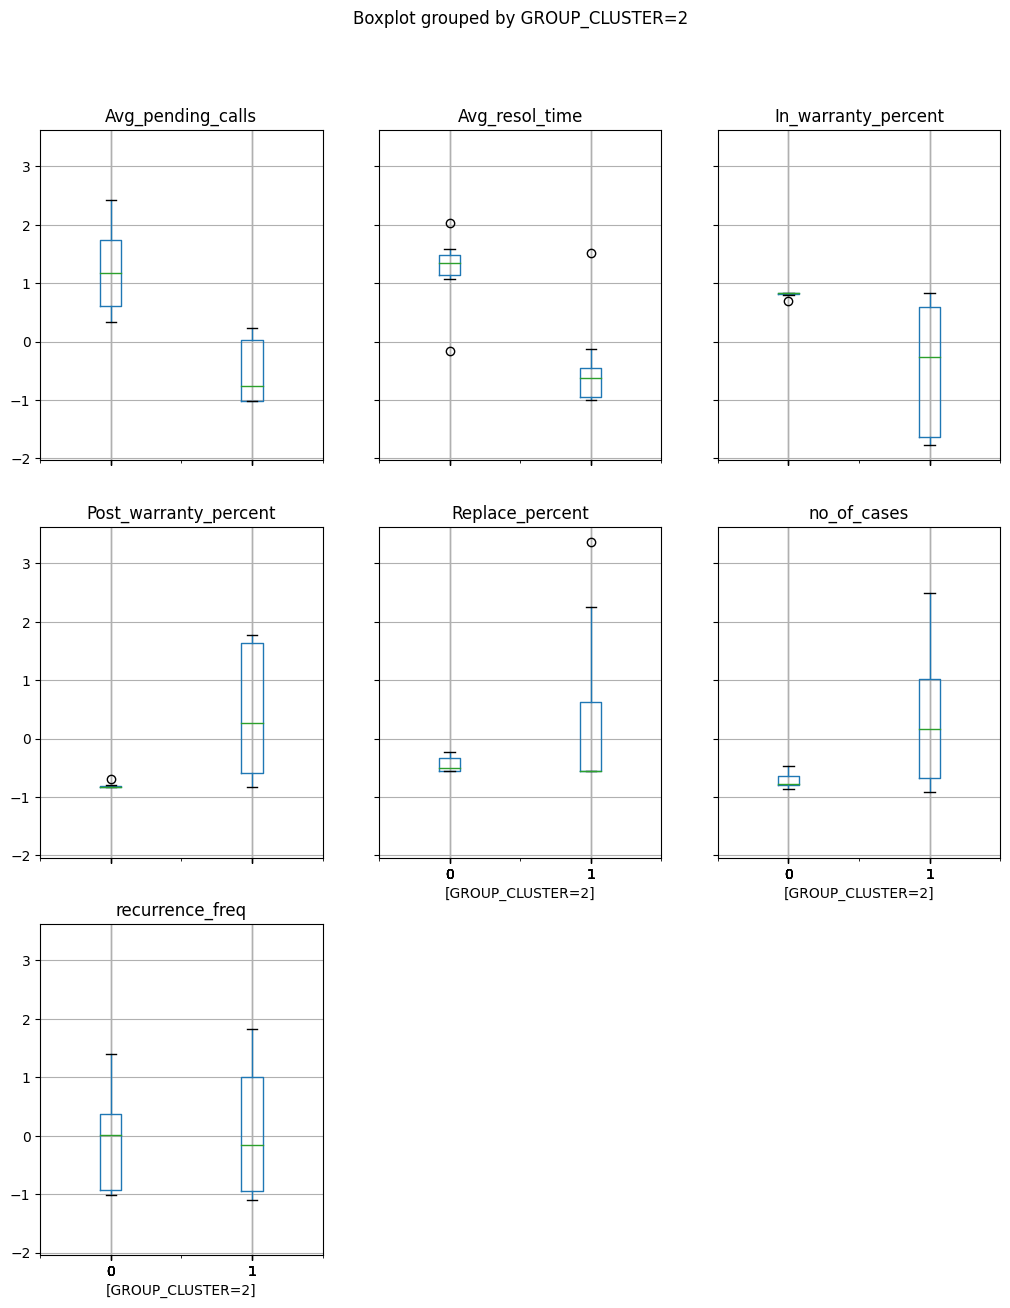

In [47]:
df2.drop('PROBLEM_TYPE', axis=1).boxplot(by='GROUP_CLUSTER=2', figsize=(12,15))
plt.show()

In [48]:
model_3 = KMeans(n_clusters = 3)
model_3.fit(num_df)
pred1 = model_3.predict(num_df)

df_upd['GROUP_CLUSTER=3'] = pred1
df3 = df_upd.drop('GROUP_CLUSTER=2', axis=1)
df3[['PROBLEM_TYPE','GROUP_CLUSTER=3']] 

,PROBLEM_TYPE,GROUP_CLUSTER=3
0,Temperature control not working,0
1,power chord does not tightly fit,2
2,Fan swing not working,0
3,Main switch does not on,2
4,Forgot mobile app password,1
5,AC stops abruptly,1
6,App hangs while entring commands,1
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,0
9,Reinstalling the app hangs the phone,1


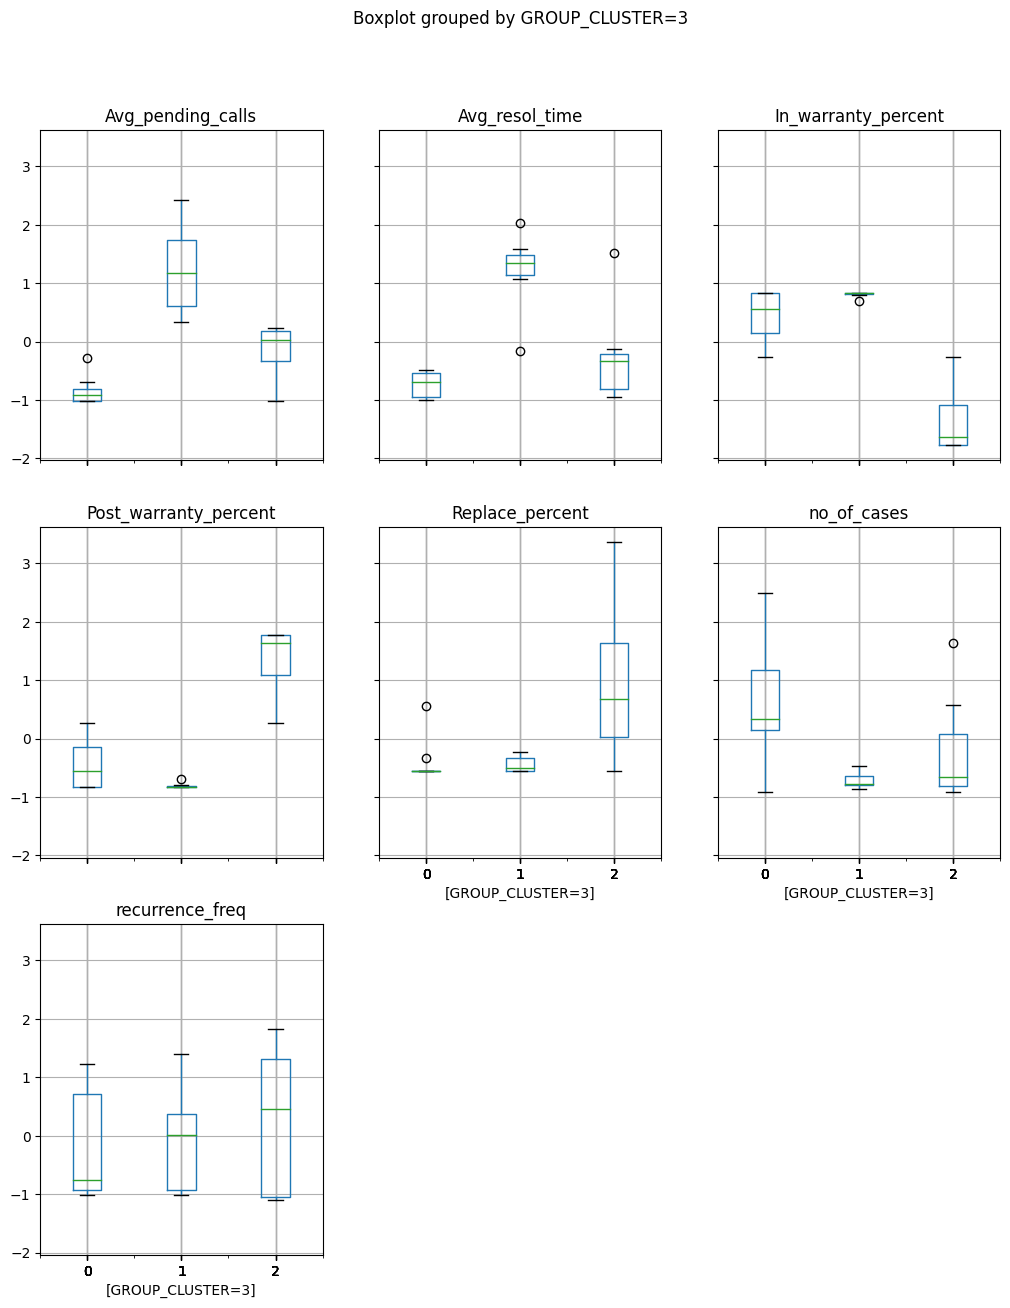

In [49]:
df3.drop('PROBLEM_TYPE', axis=1).boxplot(by='GROUP_CLUSTER=3', figsize=(12,15))
plt.show()

Looking into no_of_cases and avg_resolution_time, we can observe that in Cluster 0 No. of cases are high whereas Resolution Time is low. This cluster contains the problems where they are no that difficult, just minor issues from customer side which were resolved in short time. In contrast to it, Cluster 2 contains cases were techincal help is needed, these problems are rare problems with high difficulty to resolve. In this way clusters help to identify and classify different data points. 